In [2]:
import pandas as pd
import numpy as np
import sklearn

In [3]:
df= pd.read_csv('Country-data.csv')

In [4]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


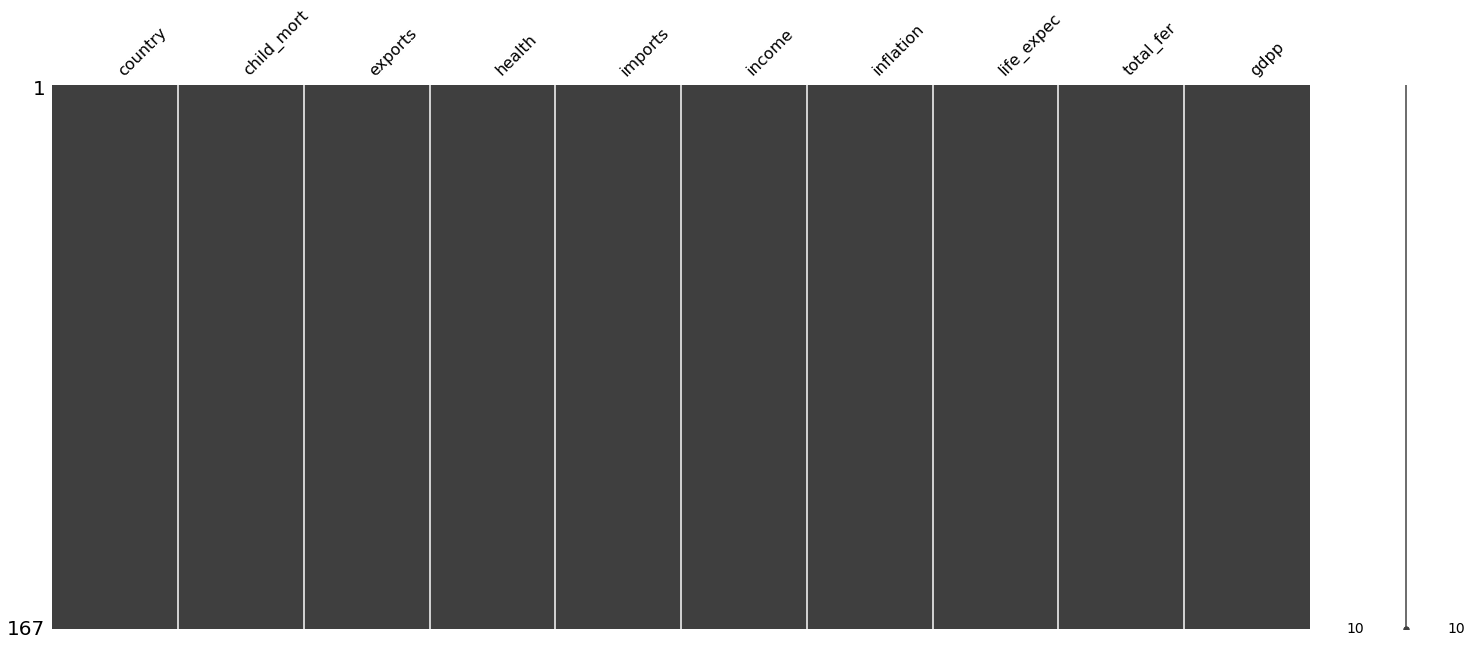

<Figure size 432x288 with 0 Axes>

In [7]:
import missingno as msno
from matplotlib import pyplot as plt
msno.matrix(df)
plt.figure()
plt.show()

In [8]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


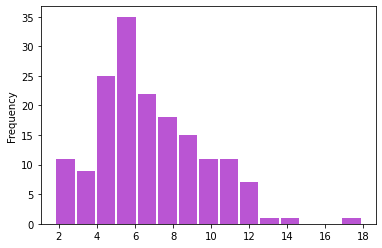

In [9]:
df['health'].plot(kind = 'hist', bins= 15 ,rwidth=0.9, color='mediumorchid');

<AxesSubplot:>

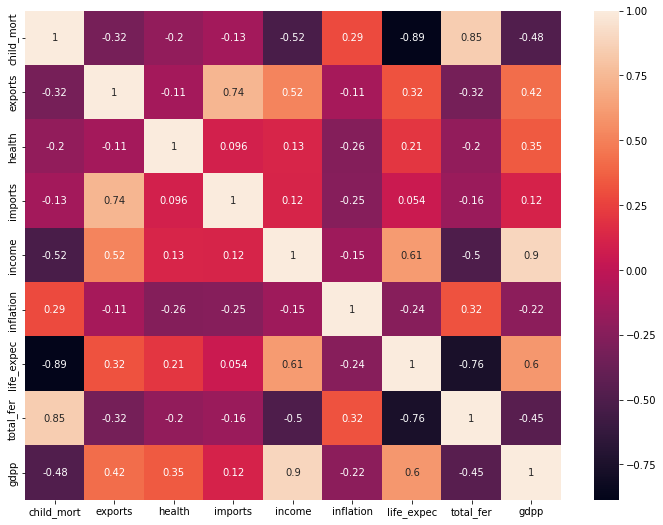

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns
corr= df.corr()
plt.figure(figsize=(12,9))
sns.heatmap(corr, annot=True)

In [11]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [12]:
from sklearn import preprocessing
names= df[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']].values

scaler = preprocessing.StandardScaler()
df = scaler.fit(names).transform(names)
df

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [13]:
df = pd.DataFrame(df, columns = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'])
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [17]:
df= df.drop(columns=['life_expec','total_fer','child_mort','gdpp'])
df

,exports,health,imports,income,inflation
0,-1.138280,0.279088,-0.082455,-0.808245,0.157336
1,-0.479658,-0.097016,0.070837,-0.375369,-0.312347
2,-0.099122,-0.966073,-0.641762,-0.220844,0.789274
3,0.775381,-1.448071,-0.165315,-0.585043,1.387054
4,0.160668,-0.286894,0.497568,0.101732,-0.601749
...,...,...,...,...,...
162,0.200917,-0.571711,0.240700,-0.738527,-0.489784
163,-0.461363,-0.695862,-1.213499,-0.033542,3.616865
164,1.130305,0.008877,1.380030,-0.658404,0.409732
165,-0.406478,-0.597272,-0.517472,-0.658924,1.500916


Text(0.5, 1.0, 'Elbow Curve')

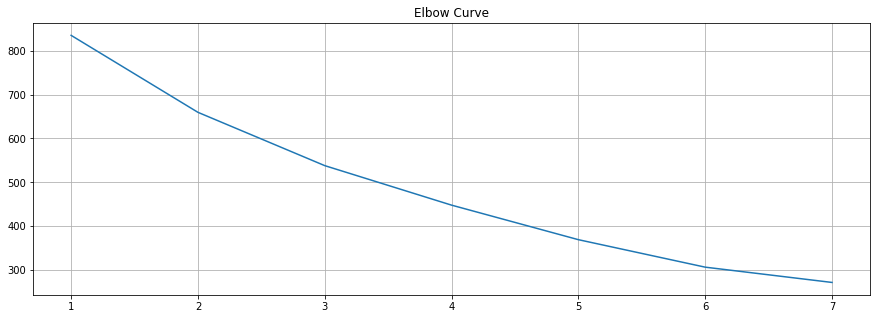

In [18]:
from sklearn.cluster import KMeans

X = df
distorsions = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(1, 8), distorsions)
plt.grid(True)
plt.title('Elbow Curve')

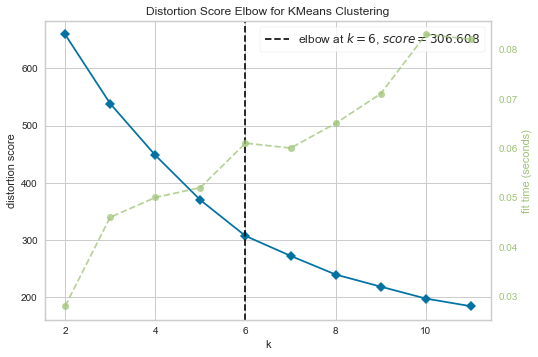

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
#from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))

x = df
visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()  

In [167]:
# so perfect k is 6 for kmeans clustering in elbow method.

In [20]:
from sklearn.metrics import silhouette_score

# number of k is NOT important 
km = KMeans()
km.fit_predict(df)
score = silhouette_score(df , km.labels_ , metric='euclidean') 
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.275


IndexError: index 2 is out of bounds for axis 0 with size 2

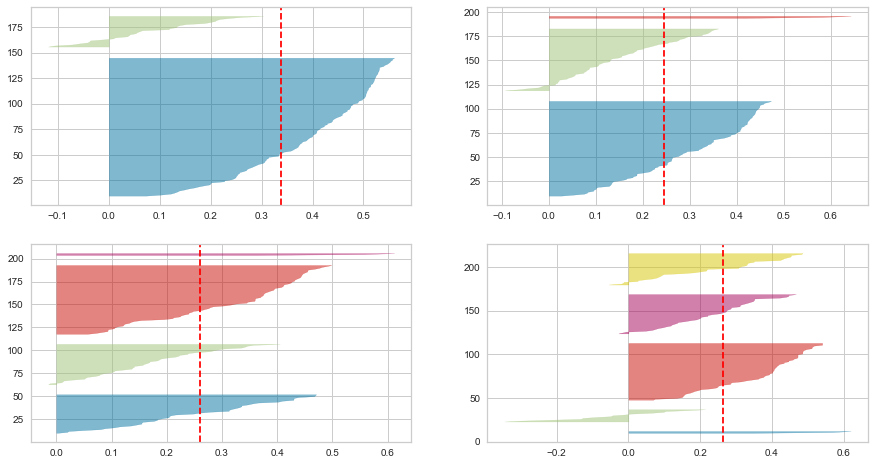

In [21]:
from yellowbrick.cluster import SilhouetteVisualizer
 
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2,3,4,5,6,7,8,9,10]:
    #Create KMeans instance for different number of clusters
    km = KMeans(n_clusters=i, init='k-means++', random_state=42) #n_init=10, max_iter=100, 
    q, mod = divmod(i, 2)
    #Fit the visualizer
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X) 

In [24]:
modell = KMeans(n_clusters=4 , init='k-means++',random_state= 11)

# re-fit our model
x = df
modell.fit(x)

# compute an average silhouette score for each point
silhouette_score_average = silhouette_score(x, modell.predict(x))
print(silhouette_score_average)

from sklearn.metrics import silhouette_samples
silhouette_score_individual = silhouette_samples(x, modell.predict(x))
# iterate through to find any negative values
for each_value in silhouette_score_individual:
    if each_value < 0:
        print(f'We have found a negative silhouette score: {each_value}')

0.25595424342642836
We have found a negative silhouette score: -0.06227396060642749
We have found a negative silhouette score: -0.017604343174868354
We have found a negative silhouette score: -0.06111029803433817
We have found a negative silhouette score: -0.005485951871571567
We have found a negative silhouette score: -0.021924101901398537


In [25]:
modell = KMeans(n_clusters=5 , init='k-means++',random_state= 11)

# re-fit our model
modell.fit(x)
silhouette_score_average = silhouette_score(x, modell.predict(x))
print(silhouette_score_average)


0.25649606105446765


In [26]:
modell = KMeans(n_clusters=6 , init='k-means++',random_state= 11)

# re-fit our model
modell.fit(x)
silhouette_score_average = silhouette_score(x, modell.predict(x))
print(silhouette_score_average)


0.27806049029336005


In [27]:
modell = KMeans(n_clusters=7 , init='k-means++',random_state= 11)

# re-fit our model
modell.fit(x)
silhouette_score_average = silhouette_score(x, modell.predict(x))
print(silhouette_score_average)


0.28634149109826396


In [28]:

# how can we find a value that optimizes this score?
# re-do our loop, try to find values with no negative scores, or one with the least!!
bad_k_values = {}

# remember, anything past 15 looked really good based on the inertia
possible_K_values = [i for i in range(2,15)]

# we start with 1, as we can not have 0 clusters in k means
# iterate through each of our values
for each_value in possible_K_values:
    
    # iterate through, taking each value from 
    model = KMeans(n_clusters=each_value, init='k-means++',random_state=30)
    model.fit(x)
    # find each silhouette score
    silhouette_score_individual = silhouette_samples(x, model.predict(x))

    # iterate through to find any negative values
    for each_silhouette in silhouette_score_individual:
        # if we find a negative, lets start counting them
        if each_silhouette < 0:
            if each_value not in bad_k_values:
                bad_k_values[each_value] = 1
            else:
                bad_k_values[each_value] += 1
            
for key, val in bad_k_values.items():
    print(f' This Many Clusters: {key} | Number of Negative Values: {val}')

# as we can see, inertia showed us that our value needed to be bigger than 15.
# but how did we choose past that?
# we optimized our K value utilizing the silhouette score, choosing 16 as it has
# the lowest amount of negative values

 This Many Clusters: 2 | Number of Negative Values: 8
 This Many Clusters: 3 | Number of Negative Values: 8
 This Many Clusters: 4 | Number of Negative Values: 5
 This Many Clusters: 5 | Number of Negative Values: 15
 This Many Clusters: 6 | Number of Negative Values: 2
 This Many Clusters: 7 | Number of Negative Values: 5
 This Many Clusters: 8 | Number of Negative Values: 10
 This Many Clusters: 9 | Number of Negative Values: 13
 This Many Clusters: 10 | Number of Negative Values: 13
 This Many Clusters: 11 | Number of Negative Values: 10
 This Many Clusters: 12 | Number of Negative Values: 19
 This Many Clusters: 13 | Number of Negative Values: 18
 This Many Clusters: 14 | Number of Negative Values: 12


In [29]:
#x= x.drop(columns=['child_mort','gdpp'])
x.columns

Index(['exports', 'health', 'imports', 'income', 'inflation'], dtype='object')

In [30]:
def KMeans_cluster(data, k):
    my_kmeans = KMeans(n_clusters= k)
    my_kmeans.fit(data) 
    clusters = my_kmeans.predict(data) 
    centroids = my_kmeans.cluster_centers_
    return clusters  #pd.DataFrame(centroids)

In [32]:
label_kmean = KMeans_cluster(df, 6)
label_kmean

array([0, 0, 0, 0, 4, 0, 0, 1, 1, 0, 1, 5, 0, 4, 4, 4, 4, 0, 4, 0, 1, 4,
       1, 5, 4, 0, 1, 4, 0, 1, 4, 0, 0, 1, 0, 0, 0, 0, 4, 1, 0, 1, 4, 4,
       1, 0, 0, 0, 0, 5, 0, 4, 4, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 4,
       0, 4, 1, 0, 0, 0, 0, 4, 1, 1, 0, 1, 4, 0, 0, 4, 5, 4, 0, 4, 4, 4,
       4, 5, 4, 2, 4, 0, 0, 4, 4, 0, 2, 0, 4, 1, 4, 0, 4, 0, 0, 0, 4, 0,
       1, 1, 0, 3, 1, 5, 0, 4, 4, 0, 0, 1, 1, 5, 0, 0, 1, 4, 5, 0, 1, 4,
       1, 2, 4, 4, 4, 1, 4, 1, 0, 0, 0, 4, 1, 1, 0, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 5, 1, 1, 1, 0, 4, 0, 4, 0, 0])

In [37]:
x["label_km"] = label_kmean
x

,exports,health,imports,income,inflation,label_km
0,-1.138280,0.279088,-0.082455,-0.808245,0.157336,0
1,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0
2,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0
3,0.775381,-1.448071,-0.165315,-0.585043,1.387054,0
4,0.160668,-0.286894,0.497568,0.101732,-0.601749,4
...,...,...,...,...,...,...
162,0.200917,-0.571711,0.240700,-0.738527,-0.489784,4
163,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0
164,1.130305,0.008877,1.380030,-0.658404,0.409732,4
165,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,0


In [38]:
print(x.loc[x.label_km==0].count()[0:1])
print(x.loc[x.label_km==1].count()[0:1])
print(x.loc[x.label_km==2].count()[0:1])
print(x.loc[x.label_km==3].count()[0:1])
print(x.loc[x.label_km==4].count()[0:1])
print(x.loc[x.label_km==5].count()[0:1])


exports    69
dtype: int64
exports    36
dtype: int64
exports    3
dtype: int64
exports    1
dtype: int64
exports    49
dtype: int64
exports    9
dtype: int64


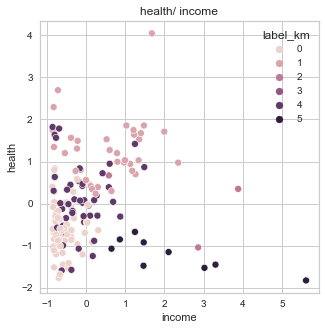

In [40]:
plt.figure(figsize=(5,5))
sns.scatterplot(y=(x['health'])
                ,x=x['income'],data=x,hue='label_km').set_title("health/ income");


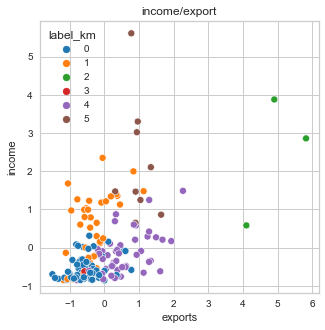

In [42]:
plt.figure(figsize=(5,5))
sns.scatterplot(y=x['income']
                ,x=x['exports'],palette='tab10', data=x,hue='label_km').set_title("income/export");

c:\users\sony\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


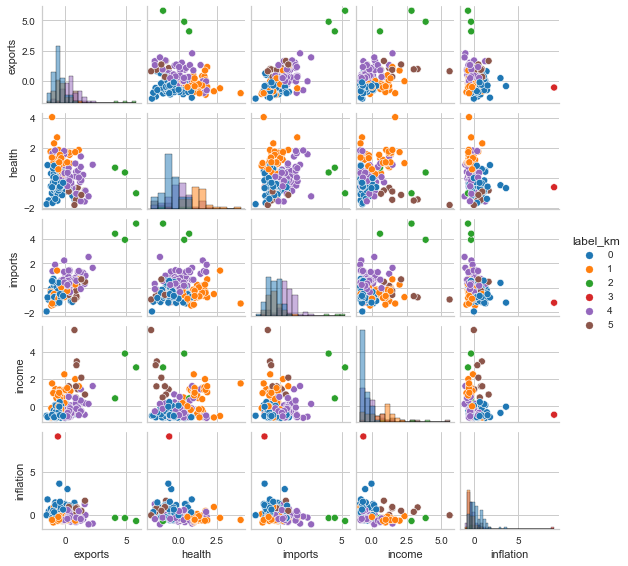

In [43]:
sns.pairplot(x, hue='label_km', diag_kind="hist", size=1.6, palette='tab10');

----------------------------------------------------------------> GMM <---------------------------------------------------------------------

In [47]:
from sklearn.mixture import GaussianMixture
gmm_model = GaussianMixture(n_components=3 ,random_state= 21)
# re-fit our model
x_gmm= x.drop(columns=['label_km'])
gmm_model.fit(x_gmm)
silhouette_score_average = silhouette_score(x_gmm, gmm_model.predict(x_gmm))
print(silhouette_score_average)

0.18374245357905775


In [49]:
gmm_model = GaussianMixture(n_components=4 ,random_state= 21)
# re-fit our model
gmm_model.fit(x_gmm)
silhouette_score_average = silhouette_score(x_gmm, gmm_model.predict(x_gmm))
print(silhouette_score_average)

0.2252089607174289


In [50]:
gmm_model = GaussianMixture(n_components=5 ,random_state= 21)
# re-fit our model
gmm_model.fit(x_gmm)
silhouette_score_average = silhouette_score(x_gmm, gmm_model.predict(x_gmm))
print(silhouette_score_average)

0.21978264486585997


In [51]:
gmm_model = GaussianMixture(n_components=6 ,random_state= 21)
# re-fit our model
gmm_model.fit(x_gmm)
silhouette_score_average = silhouette_score(x_gmm, gmm_model.predict(x_gmm))
print(silhouette_score_average)

0.20060652542258442


In [52]:
from sklearn.mixture import GaussianMixture

nclusters=4
gmm = GaussianMixture(n_components=nclusters)
gmm.fit(x_gmm)

# predict the cluster for each data point
label_gmm = gmm.predict(x_gmm)
label_gmm

array([2, 0, 1, 1, 0, 1, 2, 0, 0, 1, 0, 3, 2, 1, 1, 3, 1, 2, 0, 1, 1, 1,
       1, 3, 1, 1, 0, 1, 2, 0, 2, 2, 2, 1, 1, 1, 2, 2, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 2, 1, 1, 0, 0, 1, 2, 0, 0, 2, 0, 0, 1, 2, 1, 0,
       2, 1, 3, 2, 2, 1, 1, 3, 0, 0, 2, 0, 0, 1, 2, 0, 3, 0, 2, 1, 0, 0,
       0, 1, 1, 3, 1, 2, 2, 1, 1, 2, 3, 2, 1, 0, 0, 2, 0, 2, 2, 2, 1, 2,
       3, 0, 2, 2, 3, 3, 2, 1, 1, 1, 2, 0, 0, 3, 0, 1, 1, 2, 3, 2, 0, 1,
       0, 3, 1, 1, 0, 1, 0, 0, 2, 2, 2, 1, 0, 3, 2, 2, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 3, 0, 0, 0, 1, 1, 2, 1, 2, 1], dtype=int64)

In [53]:
x_gmm['label_gmm'] = label_gmm
x_gmm

,exports,health,imports,income,inflation,label_gmm
0,-1.138280,0.279088,-0.082455,-0.808245,0.157336,2
1,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0
2,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,1
3,0.775381,-1.448071,-0.165315,-0.585043,1.387054,1
4,0.160668,-0.286894,0.497568,0.101732,-0.601749,0
...,...,...,...,...,...,...
162,0.200917,-0.571711,0.240700,-0.738527,-0.489784,1
163,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,2
164,1.130305,0.008877,1.380030,-0.658404,0.409732,1
165,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,2


In [54]:
print(x_gmm.loc[x_gmm.label_gmm==0].count()[0:1])
print(x_gmm.loc[x_gmm.label_gmm==1].count()[0:1])
print(x_gmm.loc[x_gmm.label_gmm==2].count()[0:1])
print(x_gmm.loc[x_gmm.label_gmm==3].count()[0:1])

exports    44
dtype: int64
exports    63
dtype: int64
exports    44
dtype: int64
exports    16
dtype: int64


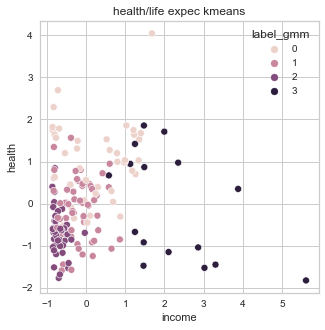

In [57]:
plt.figure(figsize=(5,5))
sns.scatterplot(y=(x_gmm['health'])
                ,x=x_gmm['income'], data=x_gmm ,hue='label_gmm').set_title("health/life expec kmeans");


c:\users\sony\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


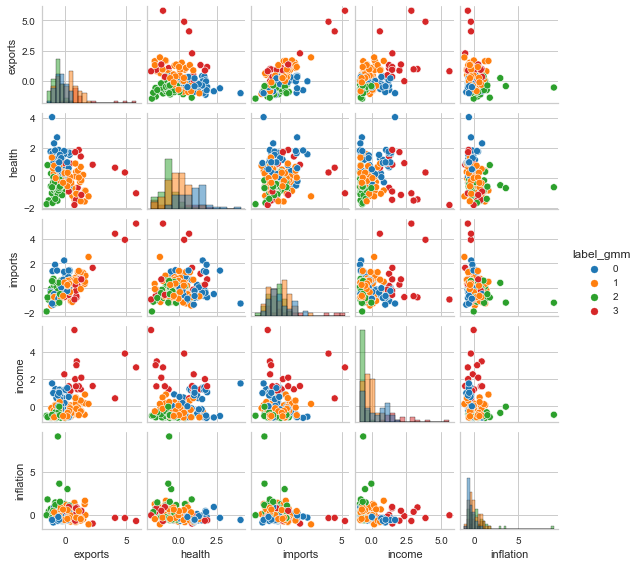

In [58]:
sns.pairplot(x_gmm, hue='label_gmm', diag_kind="hist", size=1.6, palette='tab10');

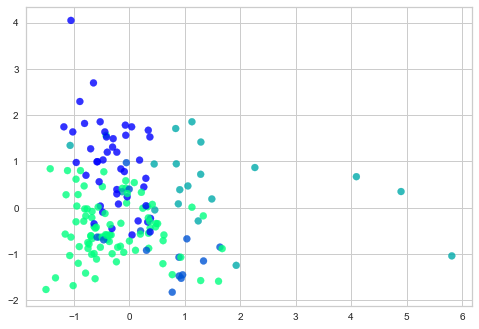

In [59]:
plt.scatter(x_gmm['exports'], x_gmm['health'],  
           c = GaussianMixture(n_components = 4).fit_predict(x_gmm) ,cmap =plt.cm.winter, alpha = 0.8) 
plt.show()

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: SPECTRAL CLUSTERING :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

In [66]:
from sklearn.cluster import SpectralClustering
spc_model = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors')  
# re-fit our model
x_spc= x_gmm.drop(columns=['label_gmm'])
silhouette_score_average = silhouette_score(x_spc, spc_model.fit_predict(x_spc))
print(silhouette_score_average)

0.3145355720187738


In [62]:
from sklearn.cluster import SpectralClustering
spc_model = SpectralClustering(n_clusters = 3, affinity ='nearest_neighbors')  
# re-fit our model
silhouette_score_average = silhouette_score(x_spc, spc_model.fit_predict(x_spc))
print(silhouette_score_average)

0.22433586760177965


In [64]:
from sklearn.cluster import SpectralClustering
spc_model = SpectralClustering(n_clusters = 4, affinity ='nearest_neighbors')  
# re-fit our model
silhouette_score_average = silhouette_score(x_spc, spc_model.fit_predict(x_spc))
print(silhouette_score_average)

0.18705379476676895


In [65]:
from sklearn.cluster import SpectralClustering
spc_model = SpectralClustering(n_clusters = 5, affinity ='nearest_neighbors')  
# re-fit our model
silhouette_score_average = silhouette_score(x_spc, spc_model.fit_predict(x_spc))
print(silhouette_score_average)

0.1674637794755221


In [67]:
bad_k_values = {}

# remember, anything past 15 looked really good based on the inertia
possible_K_values = [i for i in range(2,10)]
# we start with 1, as we can not have 0 clusters in k means
# iterate through each of our values
for each_value in possible_K_values:
    
    model = SpectralClustering(n_clusters = each_value , affinity ='nearest_neighbors')  
    silhouette_score_individual = silhouette_samples(x_spc, model.fit_predict(x_spc))

    for each_silhouette in silhouette_score_individual:
        if each_silhouette < 0:
            if each_value not in bad_k_values:
                bad_k_values[each_value] = 1
            else:
                bad_k_values[each_value] += 1
            
for key, val in bad_k_values.items():
    print(f' This Many Clusters: {key} | Number of Negative Values: {val}')


 This Many Clusters: 2 | Number of Negative Values: 4
 This Many Clusters: 3 | Number of Negative Values: 33
 This Many Clusters: 4 | Number of Negative Values: 27
 This Many Clusters: 5 | Number of Negative Values: 47
 This Many Clusters: 6 | Number of Negative Values: 40
 This Many Clusters: 7 | Number of Negative Values: 43
 This Many Clusters: 8 | Number of Negative Values: 42
 This Many Clusters: 9 | Number of Negative Values: 42


In [68]:
spectral_nn = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors')  
label_spc = spectral_nn.fit_predict(x_spc)
label_spc

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [69]:
x_spc['label_spc'] = label_spc
x_spc

,exports,health,imports,income,inflation,label_spc
0,-1.138280,0.279088,-0.082455,-0.808245,0.157336,0
1,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0
2,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0
3,0.775381,-1.448071,-0.165315,-0.585043,1.387054,0
4,0.160668,-0.286894,0.497568,0.101732,-0.601749,0
...,...,...,...,...,...,...
162,0.200917,-0.571711,0.240700,-0.738527,-0.489784,0
163,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0
164,1.130305,0.008877,1.380030,-0.658404,0.409732,0
165,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,0


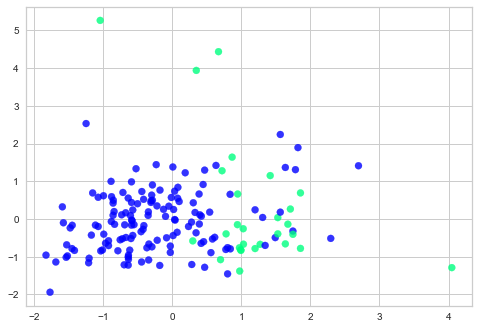

In [72]:
plt.scatter(x_spc['health'], x_spc['imports'],  
           c = label_spc ,cmap =plt.cm.winter, alpha = 0.8) 
plt.show() 

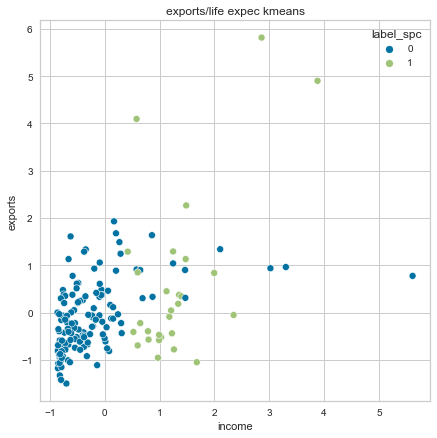

In [74]:
plt.figure(figsize=(7,7))
sns.scatterplot(y=(x_spc['exports'])
                ,x=x_spc['income'], data=x_spc ,hue='label_spc').set_title("exports/life expec kmeans");


In [75]:
silhouette_score(x_spc, label_spc)

0.3483468698459815

c:\users\sony\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


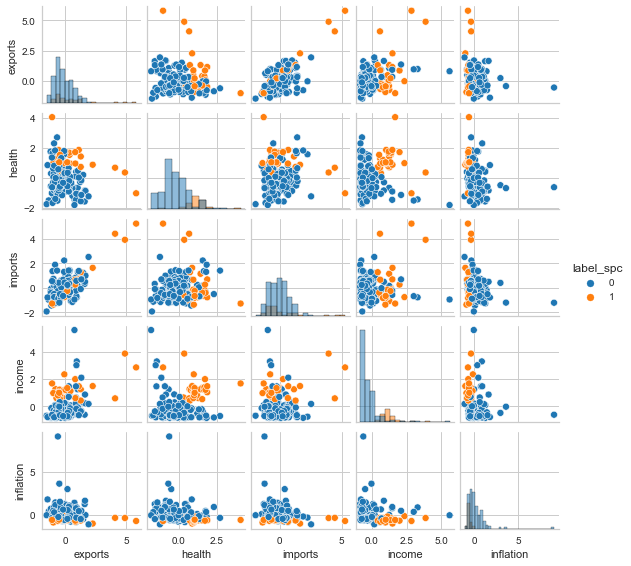

In [79]:
x_spc['label_spc']= label_spc
sns.pairplot(x_spc , hue='label_spc', diag_kind="hist", size=1.6, palette='tab10');
